#### Objective: Revenue Optimization

1. Data Cleaning

• New Column
Gross Revenue: [ [(Quantity * Average Price)*(1-Discount Rate in %  {only "Used" is adopted} ) ] + Delivery Charge ]  * (1+ GST in %)
    Note: Delivery Charge is paid by customer and taxable ; assume delivery charge is equal to its cost, breakeven

• Explore Outliers
if quantity is material, create a separately group to accommodate for further investigation afterwards / or other actions…


2. Analysis
• Gross revenue 
by time-series, product category, location, gender, specific customer id, tenure months , specific coupon type -- (** --> gender, product category  )
    
• Product
by quantity , by gender, time-series
    
• Coupon status (used / clicked / not used) -> gender
Reasons for clicked coupon: Requirements of coupon (sum, expiry date…)
    
• Loyality (tenure month) 
--> customer id, gender, location, 
--> count no. of new customers coming over time : by counting tenure months / (not recommended: Max. no of customer ID) at that end of month  


3. Limitation
• lack cost information to calculate net revenue column
• offline and online spending determination


https://www.kaggle.com/datasets/jacksondivakarr/online-shopping-dataset

In [763]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
%matplotlib inline
#pd.options.mode.copy_on_write = True

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the sales.csv file

sales_data_raw=sales_data = pd.read_csv('file.csv')

In [766]:
sales_data.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [767]:
sales_data.describe()

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52955.000000,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,26477.000000,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,15286.936089,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,0.000000,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13238.500000,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26477.000000,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39715.500000,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52954.000000,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [ ]:
print("sales_data: "+str(sales_data.info(verbose=True, show_counts=True)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

Data preprocessing

Data cleaning

In [769]:
sales_data.duplicated().any()

False

In [770]:
print(sales_data.isnull().sum())

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64


In [771]:
# sales_data = sales_data.drop(columns=['Unnamed: 0'])
sales_data.rename(columns={'Unnamed: 0':'index'}, inplace=True)
# sales_data.reset_index(inplace=True)


In [772]:
quantity_missing_data = sales_data[sales_data['Quantity'].isnull()]
print(quantity_missing_data.shape)
print(quantity_missing_data.isnull().sum())
sales_data.dropna(subset=['Quantity'], inplace=True, axis=0)


(31, 21)
index                   0
CustomerID             31
Gender                 31
Location               31
Tenure_Months          31
Transaction_ID         31
Transaction_Date       31
Product_SKU            31
Product_Description    31
Product_Category        0
Quantity               31
Avg_Price              31
Delivery_Charges       31
Coupon_Status          31
GST                    31
Date                   31
Offline_Spend          31
Online_Spend           31
Month                   0
Coupon_Code             0
Discount_pct            0
dtype: int64


In [773]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52924 entries, 0 to 52923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                52924 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52924 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null  obje

Data Preprocessing

https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/

https://www.datacamp.com/blog/data-preprocessing

Data cleaning

In [ ]:
missing_data = sales_data[sales_data['Discount_pct'].isnull()]
print(missing_data.shape)
print(missing_data.isnull().sum())

#sales_data[sales_data['Discount_pct'].isnull()]
# sales_data = sales_data[sales_data['Discount_pct'].isnull()].fillna({'Discount_pct': 0})
sales_data["Discount_pct"].fillna(0, inplace = True)

# sales_data = sales_data.dropna(subset=['Quantity'])

(400, 21)
index                    0
CustomerID               0
Gender                   0
Location                 0
Tenure_Months            0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
GST                      0
Date                     0
Offline_Spend            0
Online_Spend             0
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64


C:\Users\brian\AppData\Local\Temp\ipykernel_8100\265156068.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data["Discount_pct"].fillna(0, inplace = True)


In [ ]:
#sales_data.astype({'index': 'object'}).dtypes
# sales_data = sales_data.astype({'index': 'object'})
# sales_data.drop(['index','Transaction_ID']).drop()
# sales_data.astype({'Transaction_ID': 'object'}).dtypes
sales_data = sales_data.astype({'Transaction_ID': 'int'})

In [ ]:
sales_data = sales_data.astype({'CustomerID':'int'})
sales_data = sales_data.astype({'Tenure_Months':'int'})

In [ ]:
sales_data =sales_data.drop(['Offline_Spend','Online_Spend','index'], axis=1)
sales_data.reset_index(inplace=True)

In [ ]:
sales_data['Transaction_Date'] = pd.to_datetime(sales_data['Transaction_Date'])#.strftime('%Y-%m-%d')

sales_data['Transaction_Weekday'] = sales_data['Transaction_Date'].dt.weekday+1
# sales_data['Transaction_Month'] = sales_data['Transaction_Date'].dt.month
# type(sales_data['Transaction_Date'][1])

In [ ]:
distinct_gst_count = sales_data.groupby('Transaction_ID')['GST'].nunique().reset_index(name='Distinct_GST_Count')
top_5_records = distinct_gst_count.sort_values(by='Distinct_GST_Count', ascending=False).head(5)
print(top_5_records)

       Transaction_ID  Distinct_GST_Count
13503           34117                   4
15007           35963                   4
9499            29203                   4
14096           34865                   4
16331           37533                   4


In [ ]:
distinct_TDate_count = sales_data.groupby('Transaction_ID')['Transaction_Date'].nunique().reset_index(name='Distinct_Transaction_Date')
top_5_records = distinct_TDate_count.sort_values(by='Distinct_Transaction_Date', ascending=False).head(5)
print(top_5_records)

       Transaction_ID  Distinct_Transaction_Date
0               16679                          1
16692           37972                          1
16714           37996                          1
16713           37995                          1
16712           37994                          1


In [781]:
# sales_data['Offline_Spend'].value_counts()
# sales_data['Online_Spend'].value_counts()
#sales_data['Transaction_ID'].head()
sales_data.shape

(52924, 20)

In [782]:
sales_data['Location'].unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

Data integration

In [ ]:
sales_data['TotalPrice'] = (((sales_data['Quantity']*sales_data['Avg_Price']*   np.where(sales_data['Coupon_Status'] == "Used", ((100-sales_data['Discount_pct'])/100), 1) +  sales_data['Delivery_Charges'])* (1+sales_data['GST'])) ).round(2)

sales_data[['TotalPrice','Quantity','Avg_Price','Coupon_Status','Discount_pct','Delivery_Charges','GST']]

,TotalPrice,Quantity,Avg_Price,Coupon_Status,Discount_pct,Delivery_Charges,GST
0,159.32,1.0,153.71,Used,10.0,6.5,0.10
1,159.32,1.0,153.71,Used,10.0,6.5,0.10
2,277.24,2.0,122.77,Not Used,10.0,6.5,0.10
3,96.80,1.0,81.50,Clicked,10.0,6.5,0.10
4,176.23,1.0,153.71,Clicked,10.0,6.5,0.10
...,...,...,...,...,...,...,...
52919,262.50,1.0,250.00,Clicked,30.0,0.0,0.05
52920,18.38,1.0,25.00,Used,30.0,0.0,0.05
52921,17.64,1.0,10.80,Clicked,10.0,6.0,0.05
52922,15.37,1.0,9.60,Used,10.0,6.0,0.05


In [ ]:
sales_data['Purchase_ID'] = sales_data['Transaction_ID'].astype(int).astype(str)+ '_' + sales_data['CustomerID'].astype(str)

Data transformation

In [ ]:
product_category_set = set(sales_data['Product_Category'].unique())

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


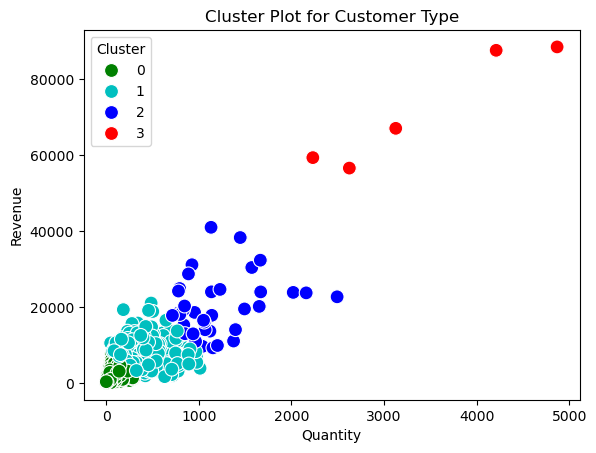

In [ ]:
customer_sales_year_1 = sales_data[['Quantity','TotalPrice','CustomerID']].groupby('CustomerID').sum()


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_sales_year_1)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)

remap_cluster_id_dict = {2:3,3:2,1:1,0:0}
customer_sales_year_1['Cluster'] = kmeans.fit_predict(scaled_data)
customer_sales_year_1['Cluster'] = customer_sales_year_1['Cluster'].map(remap_cluster_id_dict)

# Create a scatter plot for clusters
sns.scatterplot(
    data=customer_sales_year_1,
    x='Quantity',
    y='TotalPrice',
    hue='Cluster',
    palette=['g','c','b','r'], #{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
    s=100
)
plt.title("Cluster Plot for Customer Type")
plt.xlabel("Quantity")
# plt.xticks(ticks=range(0, 2500, 250))
plt.ylabel("Revenue")
# plt.yticks(ticks=range(0, 50000, 5000))
plt.legend(title="Cluster")
plt.show()

In [787]:
customer_type_dict = {3:'Large',2:'Normal',1:'Normal',0:'Normal'}
customer_sales_year_1['Customer_Type'] = customer_sales_year_1['Cluster'].map(customer_type_dict)
customer_sales_year_1.sort_values(by=['Cluster','TotalPrice'], ascending=False)
customer_sales_year_1.reset_index(inplace=True)

In [788]:
sales_data = sales_data.merge(customer_sales_year_1[['CustomerID', 'Customer_Type']], on='CustomerID', how='left')
sales_data

,index,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Coupon_Status,GST,Date,Month,Coupon_Code,Discount_pct,Transaction_Weekday,TotalPrice,Purchase_ID,Customer_Type
0,0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,Used,0.10,1/1/2019,1,ELEC10,10.0,2,159.32,16679_17850,Normal
1,1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,Used,0.10,1/1/2019,1,ELEC10,10.0,2,159.32,16680_17850,Normal
2,2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,Not Used,0.10,1/1/2019,1,ELEC10,10.0,2,277.24,16696_17850,Normal
3,3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,Clicked,0.10,1/1/2019,1,ELEC10,10.0,2,96.80,16699_17850,Normal
4,4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,Clicked,0.10,1/1/2019,1,ELEC10,10.0,2,176.23,16700_17850,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,52919,13155,F,California,8,22504,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,...,Clicked,0.05,3/10/2019,3,GC30,30.0,7,262.50,22504_13155,Normal
52920,52920,18077,M,Chicago,34,24250,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,...,Used,0.05,3/28/2019,3,GC30,30.0,4,18.38,24250_18077,Normal
52921,52921,16085,M,California,15,39991,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,...,Clicked,0.05,10/6/2019,10,NJ10,10.0,7,17.64,39991_16085,Normal
52922,52922,16085,M,California,15,39991,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,...,Used,0.05,10/6/2019,10,NJ10,10.0,7,15.37,39991_16085,Normal


Data reduction

In [789]:
product_category_set

{'Accessories',
 'Android',
 'Apparel',
 'Backpacks',
 'Bags',
 'Bottles',
 'Drinkware',
 'Fun',
 'Gift Cards',
 'Google',
 'Headgear',
 'Housewares',
 'Lifestyle',
 'More Bags',
 'Nest',
 'Nest-Canada',
 'Nest-USA',
 'Notebooks & Journals',
 'Office',
 'Waze'}

Limitation

In [791]:
distinct_count_column = 'CustomerID'
distinct_count = sales_data.groupby('Transaction_ID')[distinct_count_column].nunique().reset_index(name='Distinct_'+distinct_count_column+'_Count').sort_values(by='Distinct_'+distinct_count_column+'_Count', ascending=False)
print(distinct_count.head(5))

distinct_count_column = 'Transaction_Date'
distinct_count = sales_data.groupby('Transaction_ID')[distinct_count_column].nunique().reset_index(name='Distinct_'+distinct_count_column+'_Count').sort_values(by='Distinct_'+distinct_count_column+'_Count', ascending=False)
print(distinct_count.head(5))
distinct_count_column = 'Transaction_ID'
distinct_count = sales_data.groupby('Transaction_Date')[distinct_count_column].nunique().reset_index(name='Distinct_'+distinct_count_column+'_Count').sort_values(by='Distinct_'+distinct_count_column+'_Count', ascending=False)
print(distinct_count.head(5))



       Transaction_ID  Distinct_CustomerID_Count
6844            25950                          8
13656           34313                          8
16869           38186                          6
4998            23520                          6
9097            28715                          6
       Transaction_ID  Distinct_Transaction_Date_Count
0               16679                                1
16692           37972                                1
16714           37996                                1
16713           37995                                1
16712           37994                                1
    Transaction_Date  Distinct_Transaction_ID_Count
330       2019-11-27                            206
351       2019-12-18                            164
352       2019-12-19                            136
344       2019-12-11                            133
338       2019-12-05                            132


In [798]:
sales_data_raw.groupby(['Transaction_Date','Location'])['Online_Spend'].nunique().reset_index(name='nunique').sort_values(by='nunique',ascending=False)



,Transaction_Date,Location,nunique
0,2019-01-01,California,1
852,2019-08-28,New York,1
870,2019-09-01,New Jersey,1
869,2019-09-01,Chicago,1
868,2019-09-01,California,1
...,...,...,...
431,2019-05-06,New Jersey,1
430,2019-05-06,Chicago,1
429,2019-05-06,California,1
428,2019-05-05,New York,1


In [799]:
sales_data_raw.groupby(['Transaction_Date','Location'])['Offline_Spend'].nunique().reset_index(name='nunique').sort_values(by='nunique',ascending=False)

,Transaction_Date,Location,nunique
0,2019-01-01,California,1
852,2019-08-28,New York,1
870,2019-09-01,New Jersey,1
869,2019-09-01,Chicago,1
868,2019-09-01,California,1
...,...,...,...
431,2019-05-06,New Jersey,1
430,2019-05-06,Chicago,1
429,2019-05-06,California,1
428,2019-05-05,New York,1


The Online_Spend and Offline_Spend data are not specife for that row data, which should be the location daily spend recod.

In [793]:
sales_data

,index,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Coupon_Status,GST,Date,Month,Coupon_Code,Discount_pct,Transaction_Weekday,TotalPrice,Purchase_ID,Customer_Type
0,0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,Used,0.10,1/1/2019,1,ELEC10,10.0,2,159.32,16679_17850,Normal
1,1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,Used,0.10,1/1/2019,1,ELEC10,10.0,2,159.32,16680_17850,Normal
2,2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,Not Used,0.10,1/1/2019,1,ELEC10,10.0,2,277.24,16696_17850,Normal
3,3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,Clicked,0.10,1/1/2019,1,ELEC10,10.0,2,96.80,16699_17850,Normal
4,4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,Clicked,0.10,1/1/2019,1,ELEC10,10.0,2,176.23,16700_17850,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,52919,13155,F,California,8,22504,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,...,Clicked,0.05,3/10/2019,3,GC30,30.0,7,262.50,22504_13155,Normal
52920,52920,18077,M,Chicago,34,24250,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,...,Used,0.05,3/28/2019,3,GC30,30.0,4,18.38,24250_18077,Normal
52921,52921,16085,M,California,15,39991,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,...,Clicked,0.05,10/6/2019,10,NJ10,10.0,7,17.64,39991_16085,Normal
52922,52922,16085,M,California,15,39991,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,...,Used,0.05,10/6/2019,10,NJ10,10.0,7,15.37,39991_16085,Normal


In [794]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                52924 non-null  int64         
 1   CustomerID           52924 non-null  int32         
 2   Gender               52924 non-null  object        
 3   Location             52924 non-null  object        
 4   Tenure_Months        52924 non-null  int32         
 5   Transaction_ID       52924 non-null  int32         
 6   Transaction_Date     52924 non-null  datetime64[ns]
 7   Product_SKU          52924 non-null  object        
 8   Product_Description  52924 non-null  object        
 9   Product_Category     52924 non-null  object        
 10  Quantity             52924 non-null  float64       
 11  Avg_Price            52924 non-null  float64       
 12  Delivery_Charges     52924 non-null  float64       
 13  Coupon_Status        52924 non-

In [ ]:
sales_data.dtypes

index                           int64
CustomerID                      int32
Gender                         object
Location                       object
Tenure_Months                   int32
Transaction_ID                  int32
Transaction_Date       datetime64[ns]
Product_SKU                    object
Product_Description            object
Product_Category               object
Quantity                      float64
Avg_Price                     float64
Delivery_Charges              float64
Coupon_Status                  object
GST                           float64
Date                           object
Month                           int64
Coupon_Code                    object
Discount_pct                  float64
Transaction_Weekday             int32
TotalPrice                    float64
Purchase_ID                    object
Customer_Type                  object
dtype: object